# Notes on Pandas Python Library

#### Author: Adam Jaamour
#### 07/10/2020

https://www.kaggle.com/learn/pandas

In [1]:
import pandas as pd

# Creating, Reading and Writing

## Dataframe

A DataFrame is a table. It contains an array of individual entries, each of which has a certain value. DataFrame entries are not limited to integers (can be strings, as seen below).

In [2]:
pd.DataFrame({
    'Bob': ['I liked it.', 'It was awful.'], 
    'Sue': ['Pretty good.', 'Bland.']
})

,Bob,Sue
0,I liked it.,Pretty good.
1,It was awful.,Bland.


* Columns: dictionary-list constructor assigns values to the column labels
* Rows: ascending count from 0 (0, 1, 2, 3, ...) for the row labels

Can specify index:

In [3]:
pd.DataFrame({
    'Bob': ['I liked it.', 'It was awful.'], 
    'Sue': ['Pretty good.', 'Bland.']
}, index=["Product A", "Product B"])

,Bob,Sue
Product A,I liked it.,Pretty good.
Product B,It was awful.,Bland.


## Series

A Series is a sequence of data values. If a DataFrame is a **table**, a Series is a **list**. 

In [4]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

A Series is a single column of a DataFrame: can assign column values to the Series using an index parameter. However, a Series does not have a column name, it only has one overall name.

In [5]:
pd.Series([0, 1, 1, 2, 3, 5, 8, 13, 21], index=["A", "B", "C", "D", "E", "F", "G", "H", "I"], name="Fibonacci")

A     0
B     1
C     1
D     2
E     3
F     5
G     8
H    13
I    21
Name: Fibonacci, dtype: int64

==> think of a DataFrame as actually being just a bunch of Series "glued together"

## Reading

CSV files may have a built-in index, which pandas does not pick up on automatically. Can make pandas use that column for the index (instead of creating a new one from scratch):

In [6]:
# Not using index_col
df = pd.read_csv("data/space-missions/Space_Corrected.csv")
df.loc[0:1, :]

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success


In [7]:
# Using index_col
df = pd.read_csv("data/space-missions/Space_Corrected.csv", index_col=0)
df.loc[0:1, :]

,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success


# Indexing, Selecting and Assigning

## Accessing

Can access in similar way to Python objects e.g. access Location property of dataframe:

In [8]:
df.Location[0]

'LC-39A, Kennedy Space Center, Florida, USA'

In [9]:
# can also use the indexing ([]) operator. 
df["Location"][0]

'LC-39A, Kennedy Space Center, Florida, USA'

## Indexing

Pandas has its own accessor operators:
* Index-based selection : `iloc` (selecting data based on its numerical position in the data)
* Label-based selection: `loc` (it's the data index value, not its position, which matters)

`iloc` is conceptually simpler than `loc` because it ignores the dataset's indices. When we use `iloc` we treat the dataset like a big matrix (a list of lists), one that we have to index into by position. `loc`, by contrast, uses the information in the indices to do its work. Since your dataset usually has meaningful indices, it's usually easier to do things using `loc` instead.

(both are row first, column second)

### Index-based

In [10]:
# select first row in df
df.iloc[0]

Unnamed: 0.1                                                 0
Company Name                                            SpaceX
Location            LC-39A, Kennedy Space Center, Florida, USA
Datum                               Fri Aug 07, 2020 05:12 UTC
Detail            Falcon 9 Block 5 | Starlink V1 L9 & BlackSky
Status Rocket                                     StatusActive
 Rocket                                                     50
Status Mission                                         Success
Name: 0, dtype: object

On its own, '*:*' operator means everything. With values, indicates a range.

In [11]:
# select last column in df
df.iloc[:, -1]

0       Success
1       Success
2       Success
3       Success
4       Success
         ...   
4319    Failure
4320    Success
4321    Failure
4322    Success
4323    Success
Name: Status Mission, Length: 4324, dtype: object

In [12]:
# select second column of first three rows
df.iloc[:3, 1]
# or can pass a list
df.iloc[[0,1,2], 1]

0    SpaceX
1      CASC
2    SpaceX
Name: Company Name, dtype: object

In [13]:
# select second and third entries only
df.iloc[1:3, 1]

1      CASC
2    SpaceX
Name: Company Name, dtype: object

Can use negative numbers to start from back:

In [14]:
# select last 3 elements
df.iloc[-3:, 1]

4321      US Navy
4322    RVSN USSR
4323    RVSN USSR
Name: Company Name, dtype: object

### Label-based

In [15]:
# select first 3 launch details using label
df.loc[:3, "Detail"]

0    Falcon 9 Block 5 | Starlink V1 L9 & BlackSky
1             Long March 2D | Gaofen-9 04 & Q-SAT
2              Starship Prototype | 150 Meter Hop
3    Proton-M/Briz-M | Ekspress-80 & Ekspress-103
Name: Detail, dtype: object

In [16]:
# this operation is easier using loc than indices (selecting datum and detail of launch for first 3 rows):
df.loc[:3, ["Datum", "Detail"]]

,Datum,Detail
0,"Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky
1,"Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT
2,"Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop
3,"Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103


**iloc VS loc**:

`iloc` uses the Python stdlib indexing scheme, where **the first element of the range is included and the last one excluded**. So 0:10 will select entries 0,...,9. 

`loc`, meanwhile, indexes inclusively. So 0:10 will select entries 0,...,10.

Why the change? `loc` can index any stdlib type: strings, for example. If we have a DataFrame with index values Apples, ..., Potatoes, ..., and we want to select "all the alphabetical fruit choices between Apples and Potatoes", then it's a lot more convenient to index `df.loc['Apples':'Potatoes']` than it is to index something like `df.loc['Apples', 'Potatoet]` (t coming after s in the alphabet).

This is particularly confusing when the DataFrame index is a simple numerical list, e.g. 0,...,1000. In this case `df.iloc[0:1000]` will return 1000 entries, while `df.loc[0:1000]` return 1001 of them! To get 1000 elements using loc, you will need to go one lower and ask for `df.loc[0:999]`.

Otherwise, the semantics of using `loc` are the same as those for `iloc`.

## Manipulating index

Can manipulate index for easier operations (useful if you can come up with an index for the dataset which is better than the current one).

In [17]:
# Before setting new index:
df.head(1)

,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success


In [18]:
# After setting new index:
new_df = df.set_index("Unnamed: 0.1")
new_df.head(1)

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
Unnamed: 0.1,,,,,,,
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success


## Conditional Selection

In [19]:
# check if each launch was made by SpaceX or not
df["Company Name"] == "SpaceX"

0        True
1       False
2        True
3       False
4       False
        ...  
4319    False
4320    False
4321    False
4322    False
4323    False
Name: Company Name, Length: 4324, dtype: bool

This produces a Series of True/False booleans based on the company of each launch. This result can then be used inside of loc to select the relevant data:

In [20]:
spaceX_launches = df.loc[df["Company Name"] == "SpaceX"]
print("Total launches = {}".format(df.shape[0]))
print("Space X launches = {}".format(spaceX_launches.shape[0]))
print("{}% of launches were made by SpaceX".format(round((spaceX_launches.shape[0] / df.shape[0]) * 100, 3)))

Total launches = 4324
Space X launches = 100
2.313% of launches were made by SpaceX


Can combine conditions e.g. to also check which SpaceX launches exceeded costs of $50M

In [21]:
df[" Rocket"] = pd.to_numeric(df[" Rocket"])
spaceX_launches_over50M = df.loc[(df["Company Name"] == "SpaceX") & (df[" Rocket"] >= 50.0)]
print("Space X launches that cost over $50M = {}".format(spaceX_launches_over50M.shape[0]))

Space X launches that cost over $50M = 94


Can also use `|` operator:

In [22]:
spaceX_nasa_launches = df.loc[(df["Company Name"] == "SpaceX") | (df["Company Name"] == "NASA")]
print("Space X + NASA launches = {}".format(spaceX_nasa_launches.shape[0]))

Space X + NASA launches = 303


Can also use `isin` selector:

In [23]:
companies = ["SpaceX", "NASA"]
df.loc[df["Company Name"].isin(companies)].head(1)

,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success


Can `isnull` and `notnull` to find NaN values:

In [24]:
print("Launches with a cost specified = {}".format(df.loc[df[" Rocket"].notnull()].shape[0]))
print("Launches with the cost missing = {}".format(df.loc[df[" Rocket"].isnull()].shape[0]))

Launches with a cost specified = 964
Launches with the cost missing = 3360


## Assigning data

Assign a constant  value

In [25]:
df["Company Name"] = "Adam"
df["Company Name"]

0       Adam
1       Adam
2       Adam
3       Adam
4       Adam
        ... 
4319    Adam
4320    Adam
4321    Adam
4322    Adam
4323    Adam
Name: Company Name, Length: 4324, dtype: object

Assign iterable values

In [26]:
df[" Rocket"] =  range(len(df), 0, -1)
df[" Rocket"]

0       4324
1       4323
2       4322
3       4321
4       4320
        ... 
4319       5
4320       4
4321       3
4322       2
4323       1
Name:  Rocket, Length: 4324, dtype: int64

# Summary Functions & Maps

## Summary functions

In [27]:
# Reload original data
df = pd.read_csv("data/space-missions/Space_Corrected.csv", index_col=0)

Use `describe` function (works for both numerical and categorical data):

In [28]:
# All columns with numerical data:
df.describe()

,Unnamed: 0.1,Rocket
count,4324.000000,964.000000
mean,2161.500000,153.792199
std,1248.375611,288.450732
min,0.000000,5.300000
25%,1080.750000,40.000000
50%,2161.500000,62.000000
75%,3242.250000,164.000000
max,4323.000000,5000.000000


In [29]:
# Column with categorical data:
df.Location.describe()

count                                           4324
unique                                           137
top       Site 31/6, Baikonur Cosmodrome, Kazakhstan
freq                                             235
Name: Location, dtype: object

Can get a simple summary statistic about a column with `mean`, `median` or other functions:

In [30]:
print("count = {}".format(df[" Rocket"].count()))
print("mean = {}".format(df[" Rocket"].mean()))
print("median = {}".format(df[" Rocket"].median()))
print("minimum = {}".format(df[" Rocket"].min()))
print("maximum = {}".format(df[" Rocket"].max()))
print("standard deviation = {}".format(df[" Rocket"].std()))

count = 964
mean = 153.7921991701245
median = 62.0
minimum = 5.3
maximum = 5000.0
standard deviation = 288.45073217474624


Find unique values in a column:

In [31]:
df["Company Name"].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

Find unique values in a column + how often they occur in the dataset:

In [32]:
df["Company Name"].value_counts()[:5]

RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
Name: Company Name, dtype: int64

## Map functions

Map = function that takes one set of values and "maps" them to another set of values. There are two mapping methods:
* `map`: returns a new Series where all the values have been transformed by your function. `map()` should expect a single value from the Series (a point value, in the above example), and return a transformed version of that value.
* `apply`: is the equivalent method if we want to transform a whole DataFrame by calling a custom method on each row

E.g.: remean the launch costs to 0.

In [33]:
launch_cost_mean = df[" Rocket"].mean()
df[" Rocket"].map(lambda l: l - launch_cost_mean)

0      -103.792199
1      -124.042199
2              NaN
3       -88.792199
4        -8.792199
           ...    
4319           NaN
4320           NaN
4321           NaN
4322           NaN
4323           NaN
Name:  Rocket, Length: 4324, dtype: float64

In [34]:
launch_cost_mean = df[" Rocket"].mean()
def remean_cost(row):
    row[" Rocket"] = row[" Rocket"] - launch_cost_mean
    return row

df.apply(remean_cost, axis="columns").head(3)

,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,-103.792199,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,-124.042199,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success


Note: *If we had called reviews.apply() with axis='index', then instead of passing a function to transform each row, we would need to give a function to transform each column*.

`map()` and `apply()` return new, transformed Series and DataFrames, respectively. --> They don't modify the original data they're called on.

Pandas provides many common mapping operations as built-ins. Can perform these operations between Series of equal length e.g. combine company name and launch detail:

In [35]:
df["Company Name"] + ": " + df["Detail"]

0       SpaceX: Falcon 9 Block 5 | Starlink V1 L9 & Bl...
1               CASC: Long March 2D | Gaofen-9 04 & Q-SAT
2              SpaceX: Starship Prototype | 150 Meter Hop
3       Roscosmos: Proton-M/Briz-M | Ekspress-80 & Eks...
4                         ULA: Atlas V 541 | Perseverance
                              ...                        
4319                   US Navy: Vanguard | Vanguard TV3BU
4320                            AMBA: Juno I | Explorer 1
4321                     US Navy: Vanguard | Vanguard TV3
4322                RVSN USSR: Sputnik 8K71PS | Sputnik-2
4323                RVSN USSR: Sputnik 8K71PS | Sputnik-1
Length: 4324, dtype: object

These operators are faster than `map()` or `apply()` because they uses speed ups built into pandas. All of the standard Python operators (>, <, ==, ...) work in this manner. But not as flexible as `map()` or `apply()`, which can do more advanced things, like applying conditional logic, which cannot be done with addition and subtraction alone.

# Grouping and Sorting

## Groupwise analysis

In [36]:
# Reload original data
df = pd.read_csv("data/space-missions/Space_Corrected.csv", index_col=0)

Can replicate what `value_counts()` does by using `groupy`:
* creates a group of launches which allotted the same company name values to the given launches. 
* for each of these groups, grab the company name column and count how many times it appeared.

(*value_counts() is just a shortcut to this groupby() operation.*)

In [37]:
df.groupby("Company Name")["Company Name"].count().sort_values(ascending=False).head(20)

Company Name
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
Name: Company Name, dtype: int64

Can plot counts in a bar chart for visual counts:

<AxesSubplot:xlabel='Company Name'>

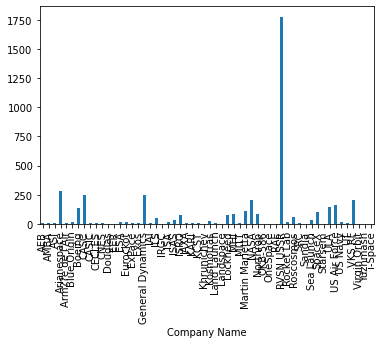

In [38]:
df.groupby("Company Name")["Company Name"].count().plot(kind="bar")

Can use any of the summary functions we've used before with this data. E.g. get the cheapest launch in each company name value category:

In [39]:
df.groupby("Company Name")[" Rocket"].min().head(10)

Company Name
AEB                  NaN
AMBA                 NaN
ASI                  NaN
Arianespace         37.0
Arm??e de l'Air      NaN
Blue Origin          NaN
Boeing             133.0
CASC                 5.3
CASIC                NaN
CECLES               NaN
Name:  Rocket, dtype: float64

Can think of each group we generate as being a slice of our DataFrame containing only data with values that match, which is accessible directly using the `apply()` method, and can be manipulated the data in any way:

In [40]:
# Selecting date of first launch for each launch per company
df.groupby("Company Name").apply(lambda df: df["Datum"].iloc[0]).head(10)

Company Name
AEB                          Mon Aug 25, 2003
AMBA                         Wed Nov 29, 1967
ASI                Fri Mar 25, 1988 19:50 UTC
Arianespace        Sat Mar 21, 2020 17:06 UTC
Arm??e de l'Air    Wed Feb 15, 1967 10:06 UTC
Blue Origin        Wed Dec 11, 2019 17:55 UTC
Boeing             Fri Nov 17, 2006 19:12 UTC
CASC               Thu Aug 06, 2020 04:01 UTC
CASIC              Thu Mar 02, 2017 23:53 UTC
CECLES             Thu Nov 04, 1971 21:10 UTC
dtype: object

Another `groupby()` method worth mentioning is `agg()`, which allows different functions to run on DF simultaneously. e.g. can generate a simple statistical summary of the dataset as follows:

In [41]:
# Show max and mon of each company launch.
df.groupby("Company Name")[" Rocket"].agg(["min","max"]).head(10)

,min,max
Company Name,,
AEB,NaN,NaN
AMBA,NaN,NaN
ASI,NaN,NaN
Arianespace,37.0,200.0
Arm??e de l'Air,NaN,NaN
Blue Origin,NaN,NaN
Boeing,133.0,350.0
CASC,5.3,69.7
CASIC,NaN,NaN


## Multi-Index

When grouping by more than one column, get multi-indexes, which differs from a regular index in that it has multiple levels.

In [42]:
new_df = df.groupby(["Unnamed: 0.1", "Company Name", "Location"]).apply(lambda df: df["Datum"].iloc[0])
new_df

Unnamed: 0.1  Company Name  Location                                                 
0             SpaceX        LC-39A, Kennedy Space Center, Florida, USA                   Fri Aug 07, 2020 05:12 UTC
1             CASC          Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China    Thu Aug 06, 2020 04:01 UTC
2             SpaceX        Pad A, Boca Chica, Texas, USA                                Tue Aug 04, 2020 23:57 UTC
3             Roscosmos     Site 200/39, Baikonur Cosmodrome, Kazakhstan                 Thu Jul 30, 2020 21:25 UTC
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA                     Thu Jul 30, 2020 11:50 UTC
                                                                                                    ...            
4319          US Navy       LC-18A, Cape Canaveral AFS, Florida, USA                     Wed Feb 05, 1958 07:33 UTC
4320          AMBA          LC-26A, Cape Canaveral AFS, Florida, USA                     Sat Feb 01, 1

In [43]:
index = new_df.index
type(index)

pandas.core.indexes.multi.MultiIndex

Multi-indices have several methods for dealing with their tiered structure which are absent for single-level indices. They also require two levels of labels to retrieve a value. (see MultiIndex / Advanced Selection section of the pandas documentation).

However, in general the multi-index method you will use most often is the one for converting back to a regular index, the `reset_index()` method:

In [44]:
new_df.reset_index()

,Unnamed: 0.1,Company Name,Location,0
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC"
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC"
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC"
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC"
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC"
...,...,...,...,...
4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC"
4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC"
4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC"
4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC"


## Sorting

Data in `new_df` is returned in index order, not in value order (when outputting the result of a `groupby`, the order of the rows is dependent on the values in the index, not in the data). 

To get data in the order we want it in use the `sort_values()` method, which defaults to an ascending sort, where the lowest values go first. 

In [45]:
new_df = pd.DataFrame(new_df)
new_df.sort_values(by="Unnamed: 0.1", ascending=True)

,,,0
Unnamed: 0.1,Company Name,Location,
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China","Thu Aug 06, 2020 04:01 UTC"
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC"
...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC"
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC"
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC"


You can sort by more than one column at a time:

In [46]:
new_df.sort_values(by=['Company Name', 'Location'])

,,,0
Unnamed: 0.1,Company Name,Location,
1032,AEB,"VLS Pad, Alc?›ntara Launch Center, Maranh?œo, Brazil","Mon Aug 25, 2003"
1221,AEB,"VLS Pad, Alc?›ntara Launch Center, Maranh?œo, Brazil","Sat Dec 11, 1999 19:40 UTC"
1354,AEB,"VLS Pad, Alc?›ntara Launch Center, Maranh?œo, Brazil","Sun Nov 02, 1997"
3711,AMBA,"LA-5B, RAAF Woomera Range Complex, Australia","Wed Nov 29, 1967"
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Wed Mar 05, 1958 18:27 UTC"
...,...,...,...
1641,VKS RF,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Tue Mar 30, 1993 12:00 UTC"
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, California, USA","Mon May 25, 2020 19:50 UTC"
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia","Wed Dec 18, 1991 03:54 UTC"


# Data Types and Missing Values

## Data Types

The data type for a column in a DataFrame or a Series is known as the `dtype`. Can use the dtype property to grab the type of a specific column. 

For instance, we can get the dtype of the launch cost column:

In [47]:
print(f"Rocket column dtype: {df[' Rocket'].dtype}")
print(f"Unnamed: 0.1 column dtype: {df['Unnamed: 0.1'].dtype}")
print(f"Status Mission column dtype: {df['Status Mission'].dtype}")

Rocket column dtype: float64
Unnamed: 0.1 column dtype: int64
Status Mission column dtype: object


`dtypes` property returns the dtype of every column in the DataFrame:

In [48]:
df.dtypes

Unnamed: 0.1        int64
Company Name       object
Location           object
Datum              object
Detail             object
Status Rocket      object
 Rocket           float64
Status Mission     object
dtype: object

Data types tell us something about how pandas is storing the data internally e.g. `float64` means that it's using a 64-bit floating point number; `int64` means a similarly sized integer instead, etc. Pandas supports more exotic data types, such as categorical data and timeseries data.

Keep in mind that columns consisting entirely of strings do not get their own type; they are instead given the `object` type.

It's possible to convert a column of one type into another by using the `astype()` function.

In [49]:
# Convert rocket cost to object:
df[" Rocket"].astype("object")

0          50
1       29.75
2         NaN
3          65
4         145
        ...  
4319      NaN
4320      NaN
4321      NaN
4322      NaN
4323      NaN
Name:  Rocket, Length: 4324, dtype: object

## Missing Data

Entries missing values are given the value `NaN` ("Not a Number"), always of the float64 dtype.

To select NaN entries use `pd.isnull()` (or `pd.notnull()`):

In [50]:
print(f"Total rows in dataframe = {df.shape[0]}")
print(f"Rows with null Rocket value in dataframe = {df[pd.isnull(df[' Rocket'])].shape[0]}")
print(f"Rows with Rocket value in dataframe = {df[pd.notnull(df[' Rocket'])].shape[0]}")

Total rows in dataframe = 4324
Rows with null Rocket value in dataframe = 3360
Rows with Rocket value in dataframe = 964


Replacing missing values is a common operation, and Pandas provides a method to replace missing values: `fillna()`, which allows for example to replace each NaN with an "Unknown":

In [51]:
df[" Rocket"].fillna("Unknown")

0            50
1         29.75
2       Unknown
3            65
4           145
         ...   
4319    Unknown
4320    Unknown
4321    Unknown
4322    Unknown
4323    Unknown
Name:  Rocket, Length: 4324, dtype: object

Or can fill with other values e.g. first non-null value that appears (backfill strategy), minimum, mean, std, etc.

## Replacing non-null values

Can be done using the `replace()` method e.g. to replace the "Eurockot" to "ESA". Useful when replacing not NaN values but data already labelled as "Unknown" with another value.

In [52]:
df["Company Name"].replace("Eurockot", "ESA")

0          SpaceX
1            CASC
2          SpaceX
3       Roscosmos
4             ULA
          ...    
4319      US Navy
4320         AMBA
4321      US Navy
4322    RVSN USSR
4323    RVSN USSR
Name: Company Name, Length: 4324, dtype: object

# Renaming and Combining

## Renaming

Data may come with column names, index names, or other naming conventions that are not satisfactory. 

`rename()` allows us to index names and/or column names. For example, to change the "Rocket" column to "Launch Cost":

In [53]:
# Renaming column elements
df.rename(columns={" Rocket":"Launch Cost"}).columns

Index(['Unnamed: 0.1', 'Company Name', 'Location', 'Datum', 'Detail',
       'Status Rocket', 'Launch Cost', 'Status Mission'],
      dtype='object')

`rename()` allows us to rename index or column values by specifying a index or column keyword parameter, respectively. It supports many input formats but Python dictionary are preferred. Example renaming some index elements (but `set_index()` is usually more convenient):

In [54]:
# Renaming index elements
df.rename(index={0:"initial"}).head(2)

,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
initial,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success


Both the row index and the column index can have their own name attribute. The `rename_axis()` method may be used to change these names:

In [55]:
df.rename_axis("Space Mission Launches", axis="rows").rename_axis("Launch Attributes", axis="columns").head(3)

Launch Attributes,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
Space Mission Launches,,,,,,,,
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success


## Combining

Sometimes need to combine different DataFrames and/or Series. Pandas has 3 core methods for doing this (in order of increasing complexity):
* `concat()`: Simplest method. Given a list of elements, this function will smush those elements together along an axis. Useful when we have data in different DataFrame or Series objects but having the same fields (columns).
* `join()`: Allows us to combine different DataFrame objects which have an index in common.
* `merge()`: Most of what merge() can do can also be done more simply with join()

### Concatenate

Concatenate videos from GB and US:

In [56]:
# Loading 2 separate datasets of YT videos (GB and US)
df_yt_GB = pd.read_csv("data/youtube-videos/GBvideos.csv", index_col=0)
df_yt_US = pd.read_csv("data/youtube-videos/USvideos.csv", index_col=0)
print(f"GB youtube videos size: {df_yt_GB.shape[0]}")
print(f"US youtube videos size: {df_yt_US.shape[0]}")

GB youtube videos size: 38916
US youtube videos size: 40949


In [57]:
# Concatenate YT videos from
df_yt = pd.concat([df_yt_GB, df_yt_US])
print(f"Concatenated GB + US youtube videos size: {df_yt.shape[0]}")
df_yt.head(3)

Concatenated GB + US youtube videos size: 79865


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...


### Join

The `lsuffix` and `rsuffix` parameters are necessary  because the data has the same column names in both British and Canadian datasets. If this wasn't true we wouldn't need them.

Example: Pull down videos that happened to be trending on the same day in both GB and US:

In [58]:
left = df_yt_GB.set_index(["title", "trending_date"])
right = df_yt_US.set_index(["title", "trending_date"])

In [59]:
left.join(right, lsuffix='_GB', rsuffix='_US').head()

channel_title_GB  \
title                                              trending_date                    
#21 How to go FAST!!! Coaching famous youtuber ... 17.14.11            Ben Cathro   
                                                   17.15.11            Ben Cathro   
                                                   17.16.11            Ben Cathro   
#ConanHaiti Preview: Haitians Roast Trump  - CO... 18.01.02             Team Coco   
                                                   18.02.02             Team Coco   

                                                                  category_id_GB  \
title                                              trending_date                   
#21 How to go FAST!!! Coaching famous youtuber ... 17.14.11                   17   
                                                   17.15.11                   17   
                                                   17.16.11                   17   
#ConanHaiti Preview: Haitians Roast Trump  - CO... 18.01.02                   23   
                                                   18.02.02                   23   

                                                                           publish_time_GB  \
title                                              trending_date                             
#21 How to go FAST!!! Coaching famous youtuber ... 17.14.11       2017-11-05T20:10:16.000Z   
                                                   17.15.11       2017-11-05T20:10:16.000Z   
                                                   17.16.11       2017-11-05T20:10:16.000Z   
#ConanHaiti Preview: Haitians Roast Trump  - CO... 18.01.02       2018-01-23T03:52:25.000Z   
                                                   18.02.02       2018-01-23T03:52:25.000Z   

                                                                                                            tags_GB  \
title                                              trending_date                                                      
#21 How to go FAST!!! Coaching famous youtuber ... 17.14.11       Ben Cathro|"sick skills"|"downhill"|"enduro"|"...   
                                                   17.15.11       Ben Cathro|"sick skills"|"downhill"|"enduro"|"...   
                                                   17.16.11       Ben Cathro|"sick skills"|"downhill"|"enduro"|"...   
#ConanHaiti Preview: Haitians Roast Trump  - CO... 18.01.02                                                  [none]   
                                                   18.02.02                                                  [none]   

                                                                  views_GB  \
title                                              trending_date             
#21 How to go FAST!!! Coaching famous youtuber ... 17.14.11          15466   
                                                   17.15.11          15818   
                                                   17.16.11          16074   
#ConanHaiti Preview: Haitians Roast Trump  - CO... 18.01.02         520630   
                                                   18.02.02         523158   

                                                                  likes_GB  \
title                                              trending_date             
#21 How to go FAST!!! Coaching famous youtuber ... 17.14.11            677   
                                                   17.15.11            686   
                                                   17.16.11            689   
#ConanHaiti Preview: Haitians Roast Trump  - CO... 18.01.02          11403   
                                                   18.02.02          11426   

                                                                  dislikes_GB  \
title                                              trending_date                
#21 How to go FAST!!! Coaching famous youtuber ... 17.14.11                 8   
                                                  